<div style="float: left; width: 25%;">
<ul>
<img src="http://www.minesnewsroom.com/sites/default/files/wysiwyg-editor/photos/CO-Mines-logo-stacked-4C-200x235w.png" style="height: 115px;">





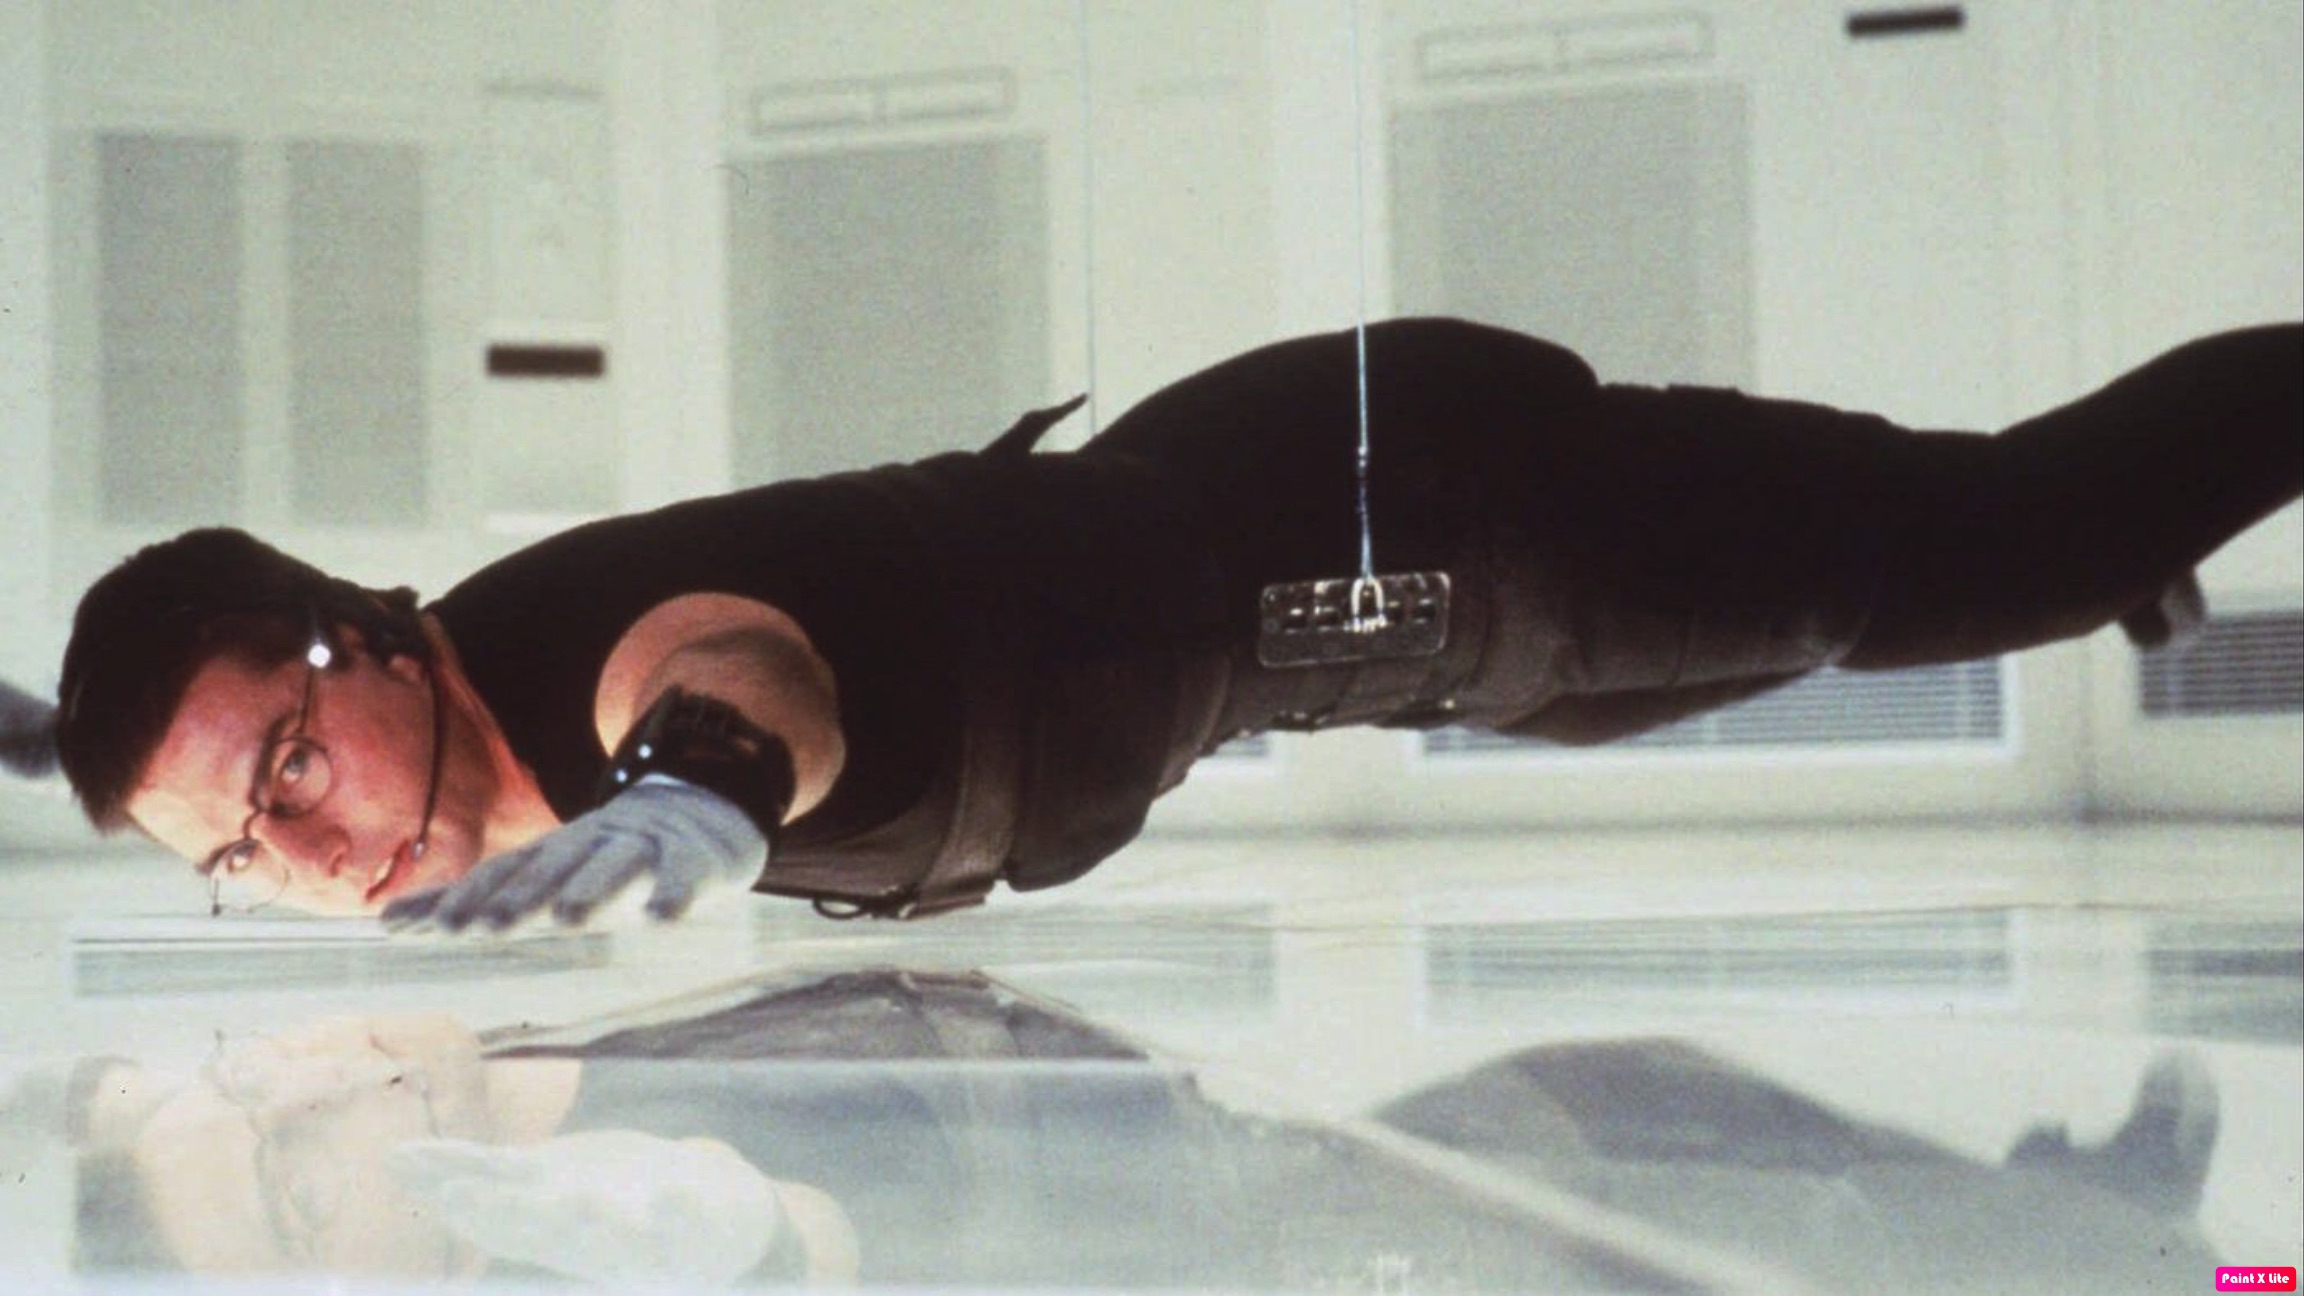



</ul>
</div>

<div style="float: right; width: 75%;">
<ul>
    <h1> CSCI 250 - Building a Sensor System </h1>
    <span style="color:Black">
    <h2> Final Project: Security Box </h2></span>
    <span style="color:Black">
    
    
    
    <h3> Alex Langfield, Alex Mikulich, Rachel Phipps, Cam Webb </h3>
    </span>
</ul>
</div>

# Introduction

As we move further into the age of technology, cyber security and overall measure of computer security is becoming more important. One of the most surefire ways to personalize security is through the use of a fingerprint scanner. Due to the fact that fingerprints are so unique it's a great way to increase your security. 

# Operation Outline
Our project is aimed at building a secure lock box that will provide its user with the greatest amount of security for their personal property. The project uses a Raspberry Pi and an Arduino, miniature computers, along with four other sensors. The fingerprint sensor, a photoresistor, accelerometer, and a buzzer are used to increase security measures for our secure safe. The concept of our code is to allow access to the user once specific guidelines are met(correct fingerprint); as well as simultaneously triggering alarms for anyone else who isn't given access. 

When someone places their finger on the sensor, the system will reference an internal library to see if they are approved to open the box. If they are, then a green LED will light up, signaling that the box can be opened, otherwise, the red LED will remain lit. Should the red LED be on and or the box is opened, the photoresistor will tell the system that the door has been opened, which will trigger the alarm in the form of a buzzer. In addition, if the box is moved from its original location because of external forces, the alarm will sound as well. 

The other three sensors will monitor other operations for added security that I will briefly describe below.

- The Accelerometer will monitor motion, if the box has been lifted at a rate greater then your typical opening and closing, the accelerometer will detect motion and trigger the alarms.

- The Photoresistor will detect the incoming light. Once the box has been opened, the alarms will trigger if a valid fingerprint has not been entered. If the fignerprint scanner doesn't recieve the correct ID, the alarms will also be triggered.

# Sensors 

The Project is designed to apply the knowledge we've learned in the class code to a system using three or more sensors.

- Fingerprint scannner - The fingerprint scanner is a sensor that communicates over ttl serial allowing it to be easily coded and implemented into a project. The scanner stores the fingerprint into a database "template" of raw data that allows the user access to the specified device once the raw data matches the current test. We had to connect the scannner to the RPi using an Arduino. The scanner uses a voltage divider into Arduino to step down the voltage as to not overload the Arduino. The Arduino communicates to the RPi using USB. 

- Buzzer - The buzzer is a mini speaker that instead of using an oscillating frequency through a quartz crystal uses an electromagnet to control a thin metal sheet. 

- LED - The LED is a light that is controlled by the current of electricity flowing through a semiconductor material. When enought current flows through the material the light will illuminate. 

- Photoresistor - Photoresistors work by increasing the resistance of the resistor within the device determined by increasing incident light intensity. Due to the nature of the high sensitivity of the semiconductor material it is easily triggered by any incoming light. The photoresistor is connected to the RPi through a breadboard using the sensor itself, a resistor, and the ADC for data rates.  

- Accelerometer - Accelerometers are extremely innovative devices, they rely on the piezoelectric effect. The accelerometer contains a microscopic crystalline structure that when undergoing accelerative forces will stress the structure and return a voltage that outputs an acceleration. It is connected through the RPi using an ADC to determine data rate. 

# Data Collection

Data collection will be measured in the form of an array for three of the devices listed above. The first device we will to collect data will be the accelerometer. 

- The accelerometer will be coded with the lock box to be sensitive to motion. The accelerometer will be run on a continuous while loop that will detect any motion. Its stationary position will not trigger any alarms, but once the box has been moved at a fast rate it will trigger the other main alarms, and store data on the severity of motion.

- The photoresistor will also store data on an array using a while loop until the box has been opened. Once the box has been opened the photoresistor will begin to store data in the array and output the results in the form of a graph.

- Fingerprint scannner stores data under an ID number. Once the fingnerprint has been verified it will return a number back allowing access or denial based of the registry. 

<h1> Data Collection Graphing </h1>
</span>

<h3> 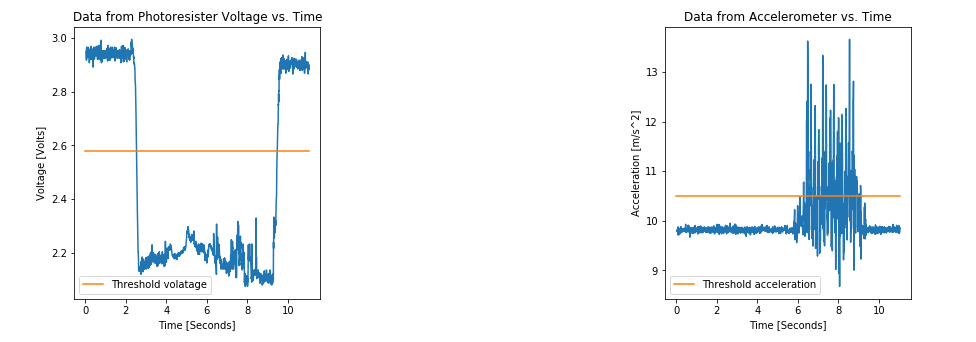 </h3> 
    </span>


# User Guide

Once the box has been programmed, the only requirement will be active power. 

For a user who owns the secure lock box created by yours truly, it will require the following to be opened:

Upon recieving the proper fingerprint that has been coded into the safes computer, the safe will open.

Once the safe has been opened the RPi will run a code to check if the fingerprint has been accepted, and will make sure the code doesn't trigger the alarms. 

If the fingeprint has been rejected and the box is moved or opened, the alarms will explode your eardrums. 

# Body of Code 

In [5]:

string = "Not Verified"
#Setup:
import RPi.GPIO as GPIO
import time
import i2cUtils as ic
import spiUtils as su
import numpy as np
import matplotlib.pyplot as plt
GPIO.setmode(GPIO.BCM)
time0 = time.time()
timeArray = np.array(range(0), dtype = 'int') 
photoArray = np.array(range(0), dtype = 'int') 
accArray = np.array(range(0), dtype = 'int') 
red = 18
green = 19

GPIO.setup(red, GPIO.OUT)
GPIO.setup(green, GPIO.OUT)
#LED setup

buzzerPin = 20

GPIO.setup(buzzerPin, GPIO.OUT)

buzzer = GPIO.PWM(buzzerPin, 1000)
#Buzzer setup

lightLevel = 800

class Acc:
    
    def __init__(self):
        pass
    
    def getAcc(self):
        return ic.readACC()
    
    def getAccX(self):
        return ic.readACC()[0]
    
    def getAccY(self):
        return ic.readACC()[1]
    
    def getAccZ(self):
        return ic.readACC()[2]
    
    def getMag(self):
        return (ic.readACC()[0]**2+ic.readACC()[1]**2+ic.readACC()[2]**2)**.5
    
def collectData():
    global timeArray, photoArray,accArray
    timeArray = np.append(timeArray,[time.time()-time0])
    photoArray = np.append(photoArray, [su.readADC(channel=0)])
    accArray = np.append(accArray, [(ic.readACC()[0]**2+ic.readACC()[1]**2+ic.readACC()[2]**2)**.5])
    
def Alarm():
    time1 = time.time()
    buzzer.start(50)
    while(time.time()-time1) < 1:
        collectData()
    buzzer.ChangeFrequency(1500)
    time2 = time.time()
    while(time.time()-time2) < 1:
        collectData()
    buzzer.ChangeFrequency(1000)
    
#serial/fingerprint scanner setup
#ser = serial.Serial("/dev/ttyUSB0", 9600)
#ser.baudrate = 9600

isArmed = True



#Alarm Code:
print("Armed!")
try:
    
    while True:
    
    #Fingerprint sensor check
        #read_ser = ser.readline()
        #string = str(bytes(read_ser), "utf-8")
        #string = string.replace('\r', "")
        #string = string.replace('\n', "")

        if string == "Verified":
            isArmed = False
        elif string == "Not Verified":
            isArmed = True

            if isArmed == False:
                GPIO.output(green, True)
                GPIO.output(red, False)
            else:
                GPIO.output(red, True)
                GPIO.output(green, False)
                if (ic.readACC()[0]**2+ic.readACC()[1]**2+ic.readACC()[2]**2)**.5 >= 10.5:
                    print("Box moved!")
                    Alarm()
                    collectData()
                elif (ic.readACC()[0]**2+ic.readACC()[1]**2+ic.readACC()[2]**2)**.5 <= 10.5:
                    buzzer.stop()
                    collectData()                 
                if su.readADC(channel=0) >= lightLevel:
                    print('Box opened!')
                    collectData()                 
                    Alarm()
                elif su.readADC(channel=0) <= lightLevel:
                    collectData()
                    buzzer.stop()
                collectData()
            
except(KeyboardInterrupt, SystemExit):
    print("Disarming!")
    elTime = time.time() - time0
    photoArray = 3.3/1024*photoArray
    np.savetxt('photo.txt', np.c_[photoArray])
    np.savetxt('accel.txt', np.c_[accArray])
    
finally:
    GPIO.cleanup()
    print("Done")



ModuleNotFoundError: No module named 'RPi'

In [4]:
photoArray = np.loadtxt('photo.txt', delimiter=',')#loads text from the file
accArray = np.loadtxt('accel.txt', delimiter=',')#loads text from the file
timeArrayLength = len(timeArray)
photoArrayLength = len(photoArray)
accArrayLength = len(accArray)
voltageLevel = lightLevel*3.3/1024

while (photoArrayLength < timeArrayLength):
    photoArray = np.append(photoArray, [photoArray[photoArrayLength-1]]) 
    photoArrayLength = len(photoArray)
while (photoArrayLength > timeArrayLength):
    timeArray = np.append(timeArray, [elTime]) 
    timeArrayLength = len(timeArray)
while (accArrayLength < timeArrayLength):
    accArray = np.append(accArray, [accArray[accArrayLength-1]]) 
    accArrayLength = len(accArray)
while (accArrayLength > timeArrayLength):
    timeArray = np.append(timeArray, [elTime]) 
    timeArrayLength = len(timeArray)


    
plt.figure(figsize =(15,5))
plt.subplot(1,3,1)
plt.plot(timeArray, photoArray)
plt.plot([0,elTime], [voltageLevel, voltageLevel], label = 'Threshold volatage')
plt.title( 'Data from Photoresister Voltage vs. Time')
plt.ylabel('Voltage [Volts]')
plt.xlabel('Time [Seconds]')
plt.legend(loc = 'lower left')
plt.show

plt.subplot(1,3,3)
plt.plot(timeArray, accArray)
plt.plot([0,elTime], [10.5, 10.5], label = 'Threshold acceleration')
plt.title('Data from Accelerometer vs. Time')
plt.ylabel('Acceleration [m/s^2]')
plt.xlabel('Time [Seconds]')
plt.legend(loc = 'lower left')
plt.show()

NameError: name 'np' is not defined